In [1]:
import pandas as pd

rfm = pd.read_csv("../data/processed/rfm_segments.csv")
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,115,Lost Customers
1,12347.0,2,7,4310.00,5,5,5,555,Champions
2,12348.0,75,4,1797.24,2,4,4,244,At Risk
3,12349.0,19,1,1757.55,4,1,4,414,Potential Loyalists
4,12350.0,310,1,334.40,1,1,2,112,Lost Customers


In [2]:
X = rfm[["Recency", "Frequency", "Monetary"]]


Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Find Optimal Number of Clusters (Elbow Method)

In [4]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


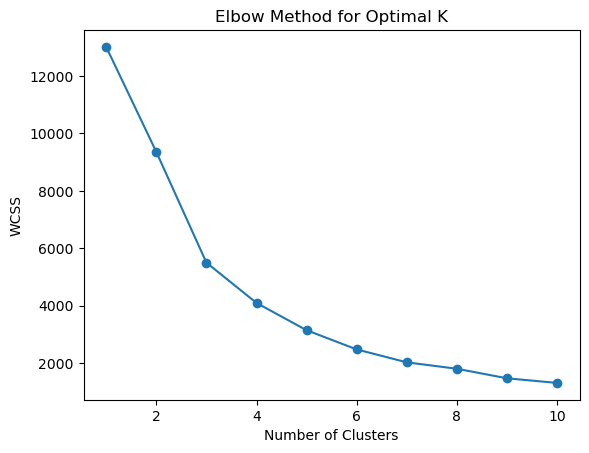

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


Apply K-Means Clustering

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(X_scaled)


In [7]:
rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [8]:
rfm.to_csv("../data/processed/rfm_clusters.csv", index=False)
